In [2]:
import quarto
import random
import logging
import pickle
from tqdm import tqdm
import math

# MinMax Player (champion for the tournament)

## Testing functions

In [2]:
def test_minmax(strategy=3, bound_value=math.factorial(5)**2, randomness=True, n_games = 100):
    '''tests how many times minmax wins against the random'''
    games_won = 0
    draws = 0
    turns = []
    for i in tqdm(range(n_games), ncols=70):
        game = quarto.Quarto()
        player1 = quarto.MinMaxPlayer(game, strategy=strategy, bound_value=bound_value, randomness=randomness)
        player2 = quarto.RandomPlayer(game)
        if random.random() < 0.5:
            game.set_players((player1, player2))
            winner = game.run(verbose=False)
            if winner == 0: games_won +=1 
            if winner == -1: draws+=1
            #count the remaining empty spots to count the turns
            turns.append(16 - sum(sum(game.get_board_status() == -1)))
        else:
            game.set_players((player2, player1))
            winner = game.run(verbose=False)
            if winner == 1: games_won+=1
            if winner == -1: draws+=1
            #count the remaining empty spots to count the turns
            turns.append(16 - sum(sum(game.get_board_status() == -1)))
    print(f'Games won = {games_won*100/n_games}%')
    print(f'Draws = {draws*100/n_games}%')
    print(f'Average turns = {sum(turns)/len(turns)}')
    return games_won*100/n_games

In [ ]:
def minmaxVSminmax(strategy1=3, bound_value1=math.factorial(5)**2, randomness1=True, 
                    strategy2=3, bound_value2=math.factorial(5)**2, randomness2=True, n_games = 100):
    '''challenge one minmax player against another'''
    games_won = 0
    draws = 0
    turns = []
    for i in tqdm(range(n_games), ncols=70):
        game = quarto.Quarto()
        player1 = quarto.MinMaxPlayer(game, strategy=strategy1, bound_value=bound_value1, randomness=randomness1)
        player2 = quarto.MinMaxPlayer(game, strategy=strategy2, bound_value=bound_value2, randomness=randomness2)
        if random.random() < 0.5:
            game.set_players((player1, player2))
            winner = game.run(verbose=False)
            if winner == 0: games_won +=1 
            if winner == -1: draws+=1
            #count the remaining empty spots to count the turns
            turns.append(16 - sum(sum(game.get_board_status() == -1)))
        else:
            game.set_players((player2, player1))
            winner = game.run(verbose=False)
            if winner == 1: games_won+=1
            if winner == -1: draws+=1
            #count the remaining empty spots to count the turns
            turns.append(16 - sum(sum(game.get_board_status() == -1)))
    print(f'Games won = {games_won*100/n_games}%')
    print(f'Draws = {draws*100/n_games}%')
    print(f'Average turns = {sum(turns)/len(turns)}')
    return games_won*100/n_games

### Play one game
In the following block we will show one example game using the default configuration with bound=3 and bound_value = math.factorial(5)**2

In [4]:
game = quarto.Quarto()
game.set_players((quarto.MinMaxPlayer(game), quarto.RandomPlayer(game)))
winner = game.run()
print(f"main: Winner: player {winner}") 


 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------

Selected piece: -1


 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------

Selected piece: 6


 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
|  6 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------

Selected piece: 6


 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
|  6 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------

Selected piece: 12


 -------------------
| 12 | -1 | -1 | -1 |
 -------------------
|  6 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -----------

## Test the player with different configurations against the random

In [18]:
winrate = test_minmax(strategy=3, bound_value=math.factorial(5)**2, randomness=True, n_games=1000)

100%|█████████████████████████████| 1000/1000 [42:16<00:00,  2.54s/it]

Games won = 99.8%
Draws = 0.0%
Average turns = 8.837


In [18]:
winrate = test_minmax(strategy=2, bound_value=math.factorial(6)**2, randomness=True, n_games=1000)

100%|█████████████████████████████| 1000/1000 [25:30<00:00,  1.53s/it]

Games won = 95.7%
Draws = 1.4%
Average turns = 9.872


In [26]:
winrate = test_minmax(strategy=1, bound_value=1, randomness=True, n_games=1000)

100%|█████████████████████████████| 1000/1000 [04:53<00:00,  3.40it/s]

Games won = 90.9%
Draws = 2.8%
Average turns = 9.796


### Test one minmax agent against the other using different configurations

In [13]:
# strategy 1 minmax VS strategy 2 with math.factorial(5)**2
winrate = minmaxVSminmax(strategy1=1, bound_value1=1, strategy2=2, bound_value2=math.factorial(5)**2)

100%|███████████████████████████████| 100/100 [01:13<00:00,  1.37it/s]

Games won = 54.0%
Draws = 1.0%
Average turns = 10.06


In [11]:
# strategy 1 minmax VS strategy 3 with math.factorial(5)**2
winrate = minmaxVSminmax(strategy1=1, bound_value1=1, strategy2=3, bound_value2=math.factorial(5)**2)

100%|███████████████████████████████| 100/100 [06:47<00:00,  4.08s/it]

Games won = 5.0%
Draws = 0.0%
Average turns = 10.5


In [15]:
# strategy 2 minmax with math.factorial(5)**2 VS strategy 3 minmax with math.factorial(5)**2
winrate = minmaxVSminmax(strategy1=2, bound_value1=math.factorial(5)**2, strategy2=3, bound_value2=math.factorial(5)**2)

100%|███████████████████████████████| 100/100 [06:00<00:00,  3.61s/it]

Games won = 4.0%
Draws = 1.0%
Average turns = 10.12


In [16]:
# strategy 2 minmax with math.factorial(6)**2 VS strategy 3 minmax with math.factorial(5)**2
winrate = minmaxVSminmax(strategy1=2, bound_value1=math.factorial(6)**2, strategy2=3, bound_value2=math.factorial(5)**2)

100%|███████████████████████████████| 100/100 [07:21<00:00,  4.41s/it]

Games won = 7.0%
Draws = 8.0%
Average turns = 10.11


The results shown above together with those regarding the minmaxplayers against the random, prove that the best player is the strategy 3 minmax with bound_value = math.factorial(5)**2.  
We could further increase the number of possible combinations but it would make the minmax slower without improving significantly the results against the random or another minmax player. We consider this player as our champion.

### Random first move and first placement on the diagonal
Let's evaluate the contribution of adding a randomness and forcing the player to place the first piece on the diagonal.
The MinMax is deterministic, meaning that if we make it play against itself it will always play the same game. If it plays against the random and it's the first player, it will always choose the same piece for the opponent. If it's the second player the first placement will always be on the top left corner of the board. Making the first move random forces the minmax to explore different parts of the tree. In addition we always place the first piece on the diagonals of the board to speed up the game.
Let's compare the minmax without randomness to the minmax with randomness.

In [8]:
#test the minmax without randomness against the champion (same strategy and same bound value)
#here games won refers to the game won by the minmax without randomness
winrate = minmaxVSminmax(randomness1=False, randomness2=True)

100%|███████████████████████████████| 100/100 [20:55<00:00, 12.56s/it]

Games won = 18.0%
Draws = 34.0%
Average turns = 14.29


The results above are very interesting: we have 18% won games, 34% draws which means we have 48% of loss. As expected the minmax player WITH randomness and first placement on the diagonal wins more than twice the games with respect to the player without randomness.  
In addition we can see that we have an average turns greater than 14 since we are still using players that are very close to optimal.

# Reinforcement Learning Player

### Testing function

In [19]:
def test_rl(q_table, n_games: int = 100):
    '''tests how many times reinforcement learning wins against the random'''
    games_won = 0
    for i in tqdm(range(n_games)):
        game=quarto.Quarto()
        player1 = quarto.RLPlayer(game)
        player1.set_q_table(q_table)
        player2 = quarto.RandomPlayer(game)
        if random.random() < 0.5:
            game.set_players((player1, player2))
            winner = game.run(verbose=False)
            if winner==0: games_won+=1
        else:
            game.set_players((player2, player1))
            winner = game.run(verbose=False)
            if winner==1: games_won+=1
    print(f'Reinforcement Learning player has won {games_won*100/n_games}% of the games against the Random.')
    return games_won*100/n_games

## Training the Reinforcement Learning agent against the Random Player
The RL agent can be trained tuning different paremeters. We will perform a grid search on:
- the learning rate alfa
- the discount factor gamma 
- the reward coefficient  

Each trained agent is then evaluated playing 100 games against the Random Player

Learning rate = 0.1
Discount factor = 0.1
Reward Coefficient = 1


100%|█████████████████████████████| 1000/1000 [03:04<00:00,  5.41it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 51.0% of the games against the Random.
Learning rate = 0.1
Discount factor = 0.1
Reward Coefficient = 10


100%|█████████████████████████████| 1000/1000 [02:54<00:00,  5.73it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 54.0% of the games against the Random.
Learning rate = 0.1
Discount factor = 0.1
Reward Coefficient = 100


100%|█████████████████████████████| 1000/1000 [02:51<00:00,  5.83it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 53.0% of the games against the Random.
Learning rate = 0.1
Discount factor = 1
Reward Coefficient = 1


100%|█████████████████████████████| 1000/1000 [02:53<00:00,  5.76it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 42.0% of the games against the Random.
Learning rate = 0.1
Discount factor = 1
Reward Coefficient = 10


100%|█████████████████████████████| 1000/1000 [02:55<00:00,  5.69it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 49.0% of the games against the Random.
Learning rate = 0.1
Discount factor = 1
Reward Coefficient = 100


100%|█████████████████████████████| 1000/1000 [02:45<00:00,  6.04it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 55.0% of the games against the Random.
Learning rate = 0.1
Discount factor = 10
Reward Coefficient = 1


100%|█████████████████████████████| 1000/1000 [02:38<00:00,  6.31it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 46.0% of the games against the Random.
Learning rate = 0.1
Discount factor = 10
Reward Coefficient = 10


100%|█████████████████████████████| 1000/1000 [02:28<00:00,  6.72it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 49.0% of the games against the Random.
Learning rate = 0.1
Discount factor = 10
Reward Coefficient = 100


100%|█████████████████████████████| 1000/1000 [03:12<00:00,  5.18it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 38.0% of the games against the Random.
Learning rate = 1
Discount factor = 0.1
Reward Coefficient = 1


100%|█████████████████████████████| 1000/1000 [03:31<00:00,  4.72it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 51.0% of the games against the Random.
Learning rate = 1
Discount factor = 0.1
Reward Coefficient = 10


100%|█████████████████████████████| 1000/1000 [03:34<00:00,  4.66it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 51.0% of the games against the Random.
Learning rate = 1
Discount factor = 0.1
Reward Coefficient = 100


100%|█████████████████████████████| 1000/1000 [03:26<00:00,  4.84it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 56.0% of the games against the Random.
Learning rate = 1
Discount factor = 1
Reward Coefficient = 1


100%|█████████████████████████████| 1000/1000 [03:21<00:00,  4.97it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 51.0% of the games against the Random.
Learning rate = 1
Discount factor = 1
Reward Coefficient = 10


100%|█████████████████████████████| 1000/1000 [03:32<00:00,  4.70it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 52.0% of the games against the Random.
Learning rate = 1
Discount factor = 1
Reward Coefficient = 100


100%|█████████████████████████████| 1000/1000 [03:29<00:00,  4.77it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 57.0% of the games against the Random.
Learning rate = 1
Discount factor = 10
Reward Coefficient = 1


100%|█████████████████████████████| 1000/1000 [03:32<00:00,  4.71it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 48.0% of the games against the Random.
Learning rate = 1
Discount factor = 10
Reward Coefficient = 10


100%|█████████████████████████████| 1000/1000 [03:30<00:00,  4.76it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 57.0% of the games against the Random.
Learning rate = 1
Discount factor = 10
Reward Coefficient = 100


100%|█████████████████████████████| 1000/1000 [03:28<00:00,  4.79it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 47.0% of the games against the Random.
Learning rate = 10
Discount factor = 0.1
Reward Coefficient = 1


100%|█████████████████████████████| 1000/1000 [04:04<00:00,  4.10it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 48.0% of the games against the Random.
Learning rate = 10
Discount factor = 0.1
Reward Coefficient = 10


100%|█████████████████████████████| 1000/1000 [02:59<00:00,  5.56it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 53.0% of the games against the Random.
Learning rate = 10
Discount factor = 0.1
Reward Coefficient = 100


100%|█████████████████████████████| 1000/1000 [03:00<00:00,  5.55it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 57.0% of the games against the Random.
Learning rate = 10
Discount factor = 1
Reward Coefficient = 1


100%|█████████████████████████████| 1000/1000 [02:59<00:00,  5.56it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 50.0% of the games against the Random.
Learning rate = 10
Discount factor = 1
Reward Coefficient = 10


100%|█████████████████████████████| 1000/1000 [02:58<00:00,  5.60it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 44.0% of the games against the Random.
Learning rate = 10
Discount factor = 1
Reward Coefficient = 100


100%|█████████████████████████████| 1000/1000 [02:54<00:00,  5.72it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 42.0% of the games against the Random.
Learning rate = 10
Discount factor = 10
Reward Coefficient = 1


100%|█████████████████████████████| 1000/1000 [02:55<00:00,  5.69it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 55.0% of the games against the Random.
Learning rate = 10
Discount factor = 10
Reward Coefficient = 10


100%|█████████████████████████████| 1000/1000 [02:57<00:00,  5.63it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 54.0% of the games against the Random.
Learning rate = 10
Discount factor = 10
Reward Coefficient = 100


100%|█████████████████████████████| 1000/1000 [03:06<00:00,  5.35it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 54.0% of the games against the Random.
Learning rate = 100
Discount factor = 0.1
Reward Coefficient = 1


100%|█████████████████████████████| 1000/1000 [02:56<00:00,  5.68it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 52.0% of the games against the Random.
Learning rate = 100
Discount factor = 0.1
Reward Coefficient = 10


100%|█████████████████████████████| 1000/1000 [02:56<00:00,  5.65it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 45.0% of the games against the Random.
Learning rate = 100
Discount factor = 0.1
Reward Coefficient = 100


100%|█████████████████████████████| 1000/1000 [03:09<00:00,  5.29it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 47.0% of the games against the Random.
Learning rate = 100
Discount factor = 1
Reward Coefficient = 1


100%|█████████████████████████████| 1000/1000 [03:21<00:00,  4.95it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 39.0% of the games against the Random.
Learning rate = 100
Discount factor = 1
Reward Coefficient = 10


100%|█████████████████████████████| 1000/1000 [02:47<00:00,  5.98it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 50.0% of the games against the Random.
Learning rate = 100
Discount factor = 1
Reward Coefficient = 100


100%|█████████████████████████████| 1000/1000 [02:14<00:00,  7.42it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 47.0% of the games against the Random.
Learning rate = 100
Discount factor = 10
Reward Coefficient = 1


100%|█████████████████████████████| 1000/1000 [02:26<00:00,  6.83it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 51.0% of the games against the Random.
Learning rate = 100
Discount factor = 10
Reward Coefficient = 10


100%|█████████████████████████████| 1000/1000 [03:03<00:00,  5.46it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 53.0% of the games against the Random.
Learning rate = 100
Discount factor = 10
Reward Coefficient = 100


100%|█████████████████████████████| 1000/1000 [03:05<00:00,  5.39it/s]


TRAINING COMPLETE
Reinforcement Learning player has won 38.0% of the games against the Random.


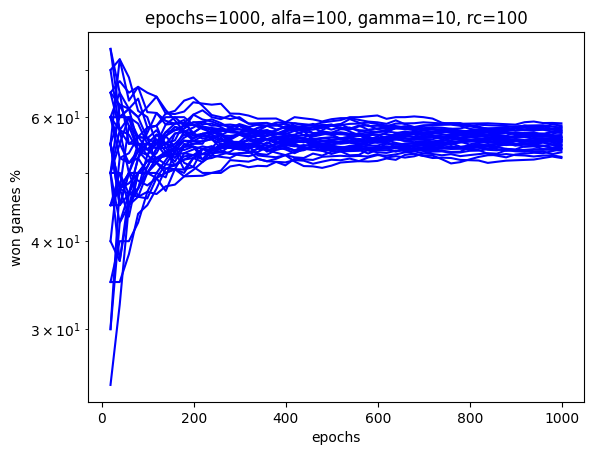

In [3]:
alfa = [0.1, 1, 10, 100]
gamma = [0.1, 1, 10]
reward_coefficient = [1, 10, 100]
results = {}

for a in alfa:
    for g in gamma:
        for rc in reward_coefficient:
            print(f'Learning rate = {a}')
            print(f'Discount factor = {g}')
            print(f'Reward Coefficient = {rc}')
            game = quarto.Quarto()
            game.reset() #just to be sure
            rl = quarto.RLPlayer(game, alfa=a, gamma=g, reward_coefficient=rc)
            opponent = quarto.RandomPlayer(game)
            q_table = rl.reinforcement_learning(opponent, epochs=1000)
            res = test_rl(q_table)
            results.update({tuple((a, g, rc)) : float(res)})
            #comment the plt.show and plt.save in player for this grid search

In [7]:
print(sorted(results.items(), key=lambda x: x[1], reverse=True))
best_lr, best_df, best_rc = max(results, key= results.get)
print(f'best learning rate is: {best_lr}')
print(f'best discount factor is: {best_df}')
print(f'best reward coefficient is: {best_rc}')

[((1, 1, 100), 57.0), ((1, 10, 10), 57.0), ((10, 0.1, 100), 57.0), ((1, 0.1, 100), 56.0), ((0.1, 1, 100), 55.0), ((10, 10, 1), 55.0), ((0.1, 0.1, 10), 54.0), ((10, 10, 10), 54.0), ((10, 10, 100), 54.0), ((0.1, 0.1, 100), 53.0), ((10, 0.1, 10), 53.0), ((100, 10, 10), 53.0), ((1, 1, 10), 52.0), ((100, 0.1, 1), 52.0), ((0.1, 0.1, 1), 51.0), ((1, 0.1, 1), 51.0), ((1, 0.1, 10), 51.0), ((1, 1, 1), 51.0), ((100, 10, 1), 51.0), ((10, 1, 1), 50.0), ((100, 1, 10), 50.0), ((0.1, 1, 10), 49.0), ((0.1, 10, 10), 49.0), ((1, 10, 1), 48.0), ((10, 0.1, 1), 48.0), ((1, 10, 100), 47.0), ((100, 0.1, 100), 47.0), ((100, 1, 100), 47.0), ((0.1, 10, 1), 46.0), ((100, 0.1, 10), 45.0), ((10, 1, 10), 44.0), ((0.1, 1, 1), 42.0), ((10, 1, 100), 42.0), ((100, 1, 1), 39.0), ((0.1, 10, 100), 38.0), ((100, 10, 100), 38.0)]
best learning rate is: 1
best discount factor is: 1
best reward coefficient is: 100


## Train the agent with the best configuration found
The plot and the results shown above prove that unfortunately tuning the parameters does not bring any significant improvement to the performances. Even the best trained agents are barely better than the random player. The reinforcement learning proves to be ineffective for this kind of problem.  
Still, now that we have performed a grid search that has given us the best possible results for the reinforcement learning we can try to train for 3000 epochs using that configuration.
The best results were found with:
- learning rate = 1
- discount factor = 1
- reward coefficient = 100

100%|█████████████████████████████| 2000/2000 [07:31<00:00,  4.43it/s]


TRAINING COMPLETE


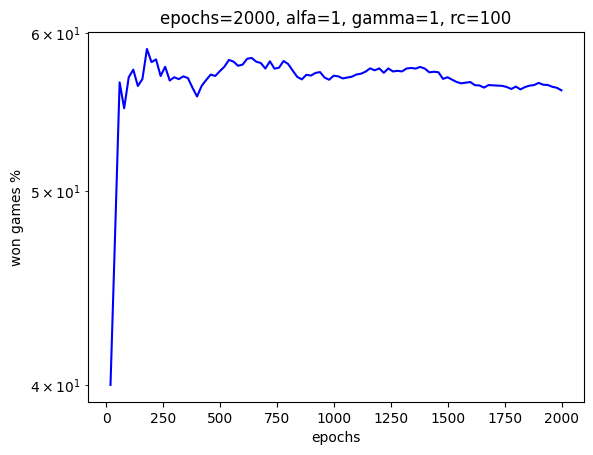

In [13]:
game = quarto.Quarto()
rl = quarto.RLPlayer(game, alfa=1, gamma=1, reward_coefficient=100)
opponent = quarto.RandomPlayer(game)
final_q_table = rl.reinforcement_learning(opponent, epochs=2000)
#now uncomment plt.show in player

The plot right above and shows us that training for more epochs doesn't bring any relevant improvement. This result unfortunately was expected: even the plot shown after the grid search proves that the performance converges after around 400 epochs and doesn't improve going further with the games.

## Test the agent

### Play one game

In the following blocks we will show the code to explicitly play one game in two cases. The first is we have run the training on the rl agent and we use directly the trained agent. The second option is to have the q_table ready to be loaded in a new rl player.  
Please keep in mind that loading the table takes a few seconds but after the first load all the future games will be very fast. 

In [9]:
#if we have run the previous cell we can just use the trained rl agent
game = quarto.Quarto()
rl.set_play_mode()
game.set_players((rl, quarto.RandomPlayer(game)))
winner = game.run()
logging.warning(f"main: Winner: player {winner}") 


 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------

Selected piece: -1


 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------

Selected piece: 4


 -------------------
| -1 |  4 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------

Selected piece: 4


 -------------------
| -1 |  4 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------

Selected piece: 1


 -------------------
| -1 |  4 | -1 | -1 |
 -------------------
| -1 | -1 | -1 |  1 |
 -------------------
| -1 | -1 | -1 | -1 |
 ------------

In [4]:
#if we have the saved q_table we can load and use that
game = quarto.Quarto()
rl_player = quarto.RLPlayer(game)
rl_player.load_q_table('q_table_epochs2000_alfa1_gamma1_rc100')
rl_player.set_play_mode()
game.set_players((rl_player, quarto.RandomPlayer(game)))
winner = game.run()
logging.warning(f"main: Winner: player {winner}")


 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------

Selected piece: -1


 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------

Selected piece: 12


 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | 12 |
 -------------------

Selected piece: 12


 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | 12 |
 -------------------

Selected piece: 10


 -------------------
| -1 | -1 | 10 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 -------------------
| -1 | -1 | -1 | -1 |
 ---------

### Test the final RL Player against the random
Let's perform a final test using the agent trained for 2000 epochs

In [6]:
data = open('q_table_epochs2000_alfa1_gamma1_rc100', 'rb')
final_q_table = pickle.load(data)
data.close()

In [42]:
test_rl(final_q_table)

Reinforcement Learning player has won 59.0% of the games against the Random.


59.0